# D4.4 Force–Displacement Graphs and Work
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D4.4.1 Motivation — From Force–Time to Force–Displacement

Earlier, we used a **force–time** graph to connect forces to **impulse**:

- The **area under a force–time graph** represents **impulse** (momentum transfer).
- Impulse records how an interaction unfolds over **time**.

In this sub-module, we introduce the analogous graphical idea for **work**:

- The **area under a force–displacement graph** represents **work** (energy transfer).
- Work records how an interaction unfolds over **displacement**.

This is the same force-based interaction viewed through a different “lens”:
- **Impulse:** force acting through time  
- **Work:** force acting through displacement  

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D4.4.2 Key Idea (1D)

For motion along the $x$-direction, the work done by a force over a displacement is

$$
w = \text{area under the } f_x \text{ vs. } x \text{ graph}.
$$

In this course (Phase D), we will estimate this area using simple shapes (rectangles and triangles) and, when needed, use Python to compute it numerically.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">


<div style="background-color:#e0f7fa; border-left:6px solid #006a80; padding:14px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Example – Work from the Area Under a Force–Displacement Graph</h3>

<strong>Problem</strong>  

A force varies with position along a straight line according to the piecewise rule:

- From $x = 0$ to $x = 2$ m: the force increases linearly from 0 N to 8 N.  
- From $x = 2$ m to $x = 5$ m: the force is constant at 8 N.

1. Make a plot of $f_x$ versus $x$.  
2. Determine the work done from $x=0$ to $x=5$ m using the area under the curve.

<strong>Methodology</strong>  

Work equals the **area under the $f_x$ vs. $x$ graph**.  
Here the area can be found using simple geometry:

- A triangle from 0 to 2 m  
- A rectangle from 2 to 5 m

We will also verify the result numerically with Python.

**Solution**

From $x=0$ to $x=2$ m, the graph forms a triangle with base $2$ m and height $8$ N:

$$
w_1 = \frac{1}{2}(2)(8) = 8\ \text{J}.
$$

From $x=2$ to $x=5$ m, the graph forms a rectangle with width $3$ m and height $8$ N:

$$
w_2 = (3)(8) = 24\ \text{J}.
$$

Total work:

$$
w = w_1 + w_2 = 8 + 24 = 32\ \text{J}.
$$

The Python calculation should report a numerical value very close to $32\ \text{J}$.


</div>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

Numerical work (trapz) from x=0 to 5 m: 32.00 J


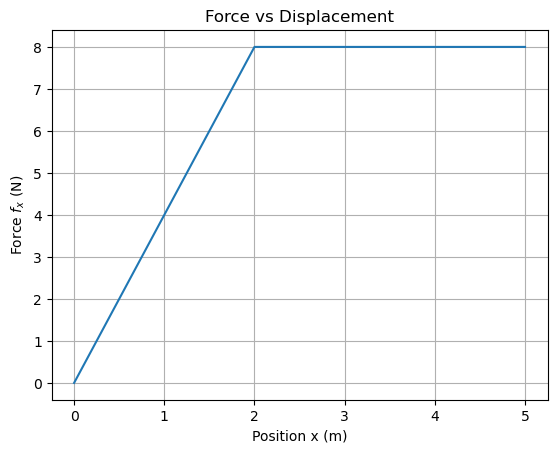

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

# Define a piecewise force function f(x)
def f(x):
    x = np.asarray(x)
    fx = np.zeros_like(x, dtype=float)
    # 0 <= x <= 2: linear ramp 0 -> 8 N
    ramp = (x >= 0) & (x <= 2)
    fx[ramp] = 4.0 * x[ramp]  # slope 4 N/m gives f(2)=8 N
    # 2 < x <= 5: constant 8 N
    flat = (x > 2) & (x <= 5)
    fx[flat] = 8.0
    return fx

# Sample x values for plotting
x = np.linspace(0, 5, 501)
fx = f(x)

# Numerical work via trapezoidal rule (area under curve)
w_num = np.trapezoid(fx, x)

print(f"Numerical work (trapz) from x=0 to 5 m: {w_num:.2f} J")

# Plot f vs x
plt.figure()
plt.plot(x, fx)
plt.xlabel("Position x (m)")
plt.ylabel("Force $f_x$ (N)")
plt.title("Force vs Displacement")
plt.grid(True)
plt.show()


<hr style="height:2px;border-width:0;color:gray;background-color:gray">


<div style="background-color:#e8f5e9; border-left:5px solid #006633; padding:12px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Box Activity 1 – Plotting Force vs. Position and Estimating Work</h3>

In this activity, you will use Python to plot a force–displacement graph and compute the work as the **area under the curve**.

<strong>Given</strong>  

A force varies with position according to

- From $x=0$ to $x=4$ m, the force increases linearly from 0 N to 12 N.  
- From $x=4$ to $x=6$ m, the force decreases linearly from 12 N to 0 N.

<strong>Task</strong>

1. Write a Python function $f(x)$ that returns the force (in N) for any $x$ between 0 and 6 m.  
2. Plot $f_x$ versus $x$ from 0 to 6 m.  
3. Use Python to compute the work from $x=0$ to $x=6$ m as the area under the curve.  
4. Compare your numerical result to a geometry estimate (triangle + triangle).

Use the code cell below as a starting point. Do not change the plotting labels.

<details>
<summary style="background-color:#006633; color:white; padding:8px; border-radius:4px; cursor:pointer;">
A Possible Hint
</summary>

<div style="background-color:#e8f5e9; padding:10px; border-radius:4px; margin-top:6px;">

The work is the area under the curve. This force profile forms a triangle up and a triangle down, so you can estimate:

$$
w \approx \frac{1}{2}(6)(12) = 36\ \text{J}.
$$

Your numerical result should be close to this value.

</div>
</details>

</div>
<br>

In [2]:
# DIY Cell

Numerical work (trapz) from x=0 to 6 m: 36.00 J


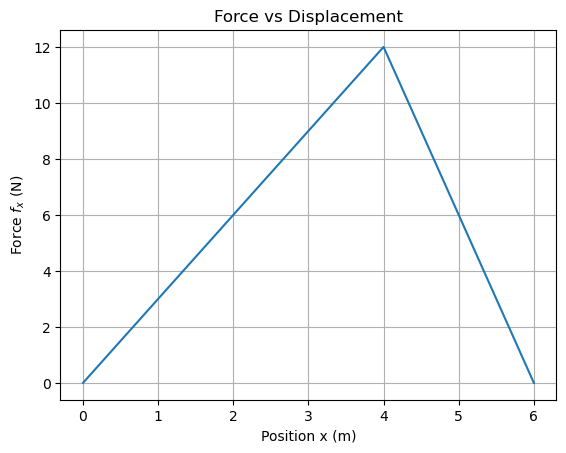

In [3]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt


def f(x):
    x = np.asarray(x)
    fx = np.zeros_like(x, dtype=float)

    # 0 <= x <= 4: ramp up 0 -> 12 N
    ramp_up = (x >= 0) & (x <= 4)
    fx[ramp_up] = 3.0 * x[ramp_up]  # slope 3 N/m gives f(4)=12 N

    # 4 < x <= 6: ramp down 12 -> 0 N
    ramp_down = (x > 4) & (x <= 6)
    fx[ramp_down] = -6.0 * (x[ramp_down] - 4) + 12  # line through (4,12) to (6,0)

    return fx

# Sample x values for plotting
x = np.linspace(0, 6, 601)
fx = f(x)

# Numerical work via trapezoidal rule
w_num = np.trapezoid(fx, x)
print(f"Numerical work (trapz) from x=0 to 6 m: {w_num:.2f} J")

# Plot f vs x
plt.figure()
plt.plot(x, fx)
plt.xlabel("Position x (m)")
plt.ylabel("Force $f_x$ (N)")
plt.title("Force vs Displacement")
plt.grid(True)
plt.show()


<hr style="height:2px;border-width:0;color:gray;background-color:gray">